In [1]:
from requests import get
url = 'https://www.imdb.com/list/ls021138039/'
response = get(url)
print(response.text[:500])







<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///list/ls021138039?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      ue


In [2]:
# Check the class for all the elements. If the number match, then we are good.

In [4]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [7]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-detail')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
48


In [10]:
first_movie = movie_containers[0]
first_movie;

In [11]:
first_movie.div

<div class="lister-item-image ribbonize" data-tconst="tt4500922">
<a href="/title/tt4500922/?ref_=ttls_li_i"> <img alt="Maze Runner: The Death Cure" class="loadlate" data-tconst="tt4500922" height="209" loadlate="https://m.media-amazon.com/images/M/MV5BMTYyNzk3MDc2NF5BMl5BanBnXkFtZTgwMDk3OTM1NDM@._V1_UY209_CR0,0,140,209_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB470041630_.png" width="140"/>
</a> </div>

In [12]:
first_movie.h3

<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt4500922/?ref_=ttls_li_tt">Maze Runner: The Death Cure</a>
<span class="lister-item-year text-muted unbold">(2018)</span>
</h3>

In [13]:
first_movie.h3.a

<a href="/title/tt4500922/?ref_=ttls_li_tt">Maze Runner: The Death Cure</a>

In [16]:
first_name = first_movie.h3.a.text
first_name

'Maze Runner: The Death Cure'

In [27]:
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold').text
first_year

'(2018)'

In [31]:
first_rating = float(first_movie.find('span', class_ = 'ipl-rating-star__rating').text)
first_rating

6.2

In [32]:
first_mscore = first_movie.find('span', class_ = 'metascore')
first_mscore = int(first_mscore.text)
first_mscore

50

In [36]:
first_votes = first_movie.find('span', attrs = {'name':'nv'})

In [37]:
first_votes = int(first_votes['data-value'])
first_votes 


85267

In [38]:
thirteenth_movie_mscore = movie_containers[13].find('div', class_ = 'ratings-metascore')
type(thirteenth_movie_mscore)

NoneType

In [39]:

# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Extract data from individual movie container
for container in movie_containers:

    # If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:

        # The name
        name = container.h3.a.text
        names.append(name)

        # The year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)

        # The IMDB rating
        imdb = float(container.find('span', class_='ipl-rating-star__rating').text)
        imdb_ratings.append(imdb)

        # The Metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))

        # The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

In [40]:
import pandas as pd

test_df = pd.DataFrame({'movie': names,
                       'year': years,
                       'imdb': imdb_ratings,
                       'metascore': metascores,
                       'votes': votes})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 5 columns):
movie        47 non-null object
year         47 non-null object
imdb         47 non-null float64
metascore    47 non-null int64
votes        47 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.9+ KB
None


,movie,year,imdb,metascore,votes
0,Maze Runner: The Death Cure,(2018),6.2,50,85267
1,Black Panther,(2018),7.4,88,461220
2,Red Sparrow,(2018),6.6,53,127885
3,Avengers: Infinity War,(2018),8.5,68,585549
4,Ocean's 8,(2018),6.2,61,127085
5,Incredibles 2,(2018),7.8,80,176533
6,Mission: Impossible - Fallout,(2018),7.8,86,214403
7,Smallfoot,(2018),6.7,60,18963
8,Ralph Breaks the Internet,(2018),7.2,71,48849
9,Aquaman,(2018),7.4,55,165944


In [41]:
headers = {"Accept-Language": "en-US, en;q=0.5"}

2000+

In [46]:
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2010,2019)]

In [47]:
from time import sleep
from random import randint

In [48]:

from time import time

start_time = time()
requests = 0

for _ in range(5):
    # A request would go here
    requests += 1
    sleep(randint(1,3))
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))


Request: 1; Frequency: 0.4997908751998006 requests/s
Request: 2; Frequency: 0.666161284794438 requests/s
Request: 3; Frequency: 0.4995208607491801 requests/s
Request: 4; Frequency: 0.4441453334313898 requests/s
Request: 5; Frequency: 0.45428127881157365 requests/s


In [49]:
from IPython.core.display import clear_output

start_time = time()
requests = 0

for _ in range(5):
    # A request would go here
    requests += 1
    sleep(randint(1,3))
    current_time = time()
    elapsed_time = current_time - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    clear_output(wait = True)

Request: 5; Frequency: 0.4158836362205656 requests/s


In [50]:
from warnings import warn
warn("Warning Simulation")

c:\users\linhd\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Warning Simulation
  


In [51]:

# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every year in the interval 2010-2019
for year_url in years_url:

    # For every page in the interval 1-5
    for page in pages:

        # Make a get request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url + 
        '&sort=num_votes,desc&page=' + page, headers = headers)

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 50:
            warn('Number of requests was greater than expected.')  
            break 

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the  movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie 
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year 
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))


Request:36; Frequency: 0.07820622896843017 requests/s


In [70]:
# Get stuff in DataFrame
movie_ratings = pd.DataFrame({'movie': names,
                              'year': years,
                              'imdb': imdb_ratings,
                              'metascore': metascores,
                              'votes': votes})
print(movie_ratings.info())
movie_ratings.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 5 columns):
movie        1656 non-null object
year         1656 non-null object
imdb         1656 non-null float64
metascore    1656 non-null int64
votes        1656 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 64.8+ KB
None


,movie,year,imdb,metascore,votes
0,Inception,(2010),8.8,74,1799695
1,Shutter Island,(2010),8.1,63,983982
2,Toy Story 3,(2010),8.3,92,667157
3,Black Swan,(2010),8.0,79,638580
4,Iron Man 2,(2010),7.0,57,633681
5,How to Train Your Dragon,(2010),8.1,74,595638
6,The King's Speech,(2010),8.0,88,584869
7,The Social Network,(2010),7.7,95,560871
8,Kick-Ass,(2010),7.6,66,491089
9,Despicable Me,(2010),7.7,72,456440


In [71]:
movie_ratings['year'].unique()

array(['(2010)', '(I) (2010)', '(2011)', '(I) (2011)', '(2012)',
       '(I) (2012)', '(2013)', '(I) (2013)', '(2014)', '(I) (2014)',
       '(II) (2014)', '(2015)', '(I) (2015)', '(II) (2015)', '(2016)',
       '(II) (2016)', '(I) (2016)', '(IX) (2016)', '(2017)', '(I) (2017)',
       '(2018)', '(I) (2018)', '(III) (2018)'], dtype=object)

In [72]:
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)

In [73]:
movie_ratings['year'].head(30)
# movie_ratings.head(30)

0     2010
1     2010
2     2010
3     2010
4     2010
5     2010
6     2010
7     2010
8     2010
9     2010
10    2010
11    2010
12    2010
13    2010
14    2010
15    2010
16    2010
17    2010
18    2010
19    2010
20    2010
21    2010
22    2010
23    2010
24    2010
25    2010
26    2010
27    2010
28    2010
29    2010
Name: year, dtype: int32

In [57]:
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,4.1,27.0
max,8.8,100.0


In [60]:
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(3)

,movie,year,imdb,metascore,votes,n_imdb
0,Inception,2010,8.8,74,1799695,88.0
1,Shutter Island,2010,8.1,63,983982,81.0
2,Toy Story 3,2010,8.3,92,667157,83.0


In [61]:
movie_ratings.to_csv('movie_ratings.csv')

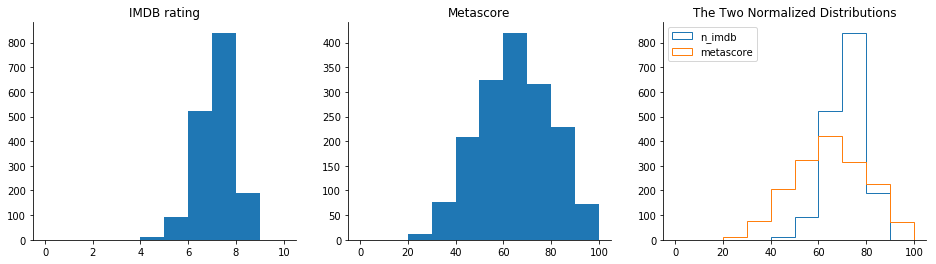

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes

ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')

ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')

ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()
